In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix, mean_squared_error, r2_score,roc_curve, auc

# Load dataset
df = pd.read_csv(r"/Users/ryeo/dev/class/cs_m148/prostate_cancer_detection/Prostate_Cancer.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
# Data preprocessing
df.drop("id", axis = 1, inplace = True)
missing_values = df.isnull().sum()

# For diagnosis_result, convert M to 1 and B to 0
classification = {'B' : 0, 'M' : 1}
df['diagnosis_result'] = df['diagnosis_result'].map(classification)
target = df['diagnosis_result']
independent = df.iloc[:, 1:10]

In [7]:
# Model Training
x_train, x_test, y_train, y_test = train_test_split(independent, target, test_size = 0.3, random_state = 0)

# Set optimal hyper parameters using grid search for SVC (regularization, kernel type, kernel coefficient)
hyper_parameters = {'C' : [0.1,1,10,100,1000], 'kernel':['rbf', 'linear'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(SVC(), hyper_parameters, refit=True, verbose = 3)
grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)

# Make predictions
y_pred = grid.predict(x_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.643 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.786 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.786 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.857 total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.643 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

In [8]:
# Evaluate by computing precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Print weighted results
print(f'Weighted Precision: {precision}')
print(f'Weighted Recall: {recall}')
print(f'Weighted F1 Score: {f1_score}')

# Calculate MSE/RMSE/R^2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

Weighted Precision: 0.9384615384615385
Weighted Recall: 0.9333333333333333
Weighted F1 Score: 0.928
MSE: 0.06666666666666667
RMSE: 0.2581988897471611
R2: 0.5833333333333334


In [9]:
# More in depth statistics for each of B/M (0/1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.92      1.00      0.96        24

    accuracy                           0.93        30
   macro avg       0.96      0.83      0.88        30
weighted avg       0.94      0.93      0.93        30



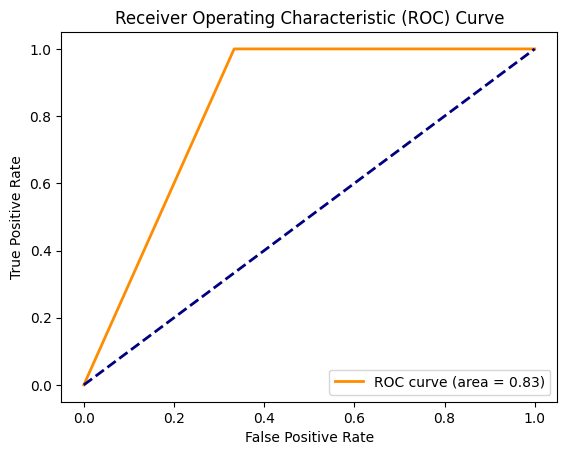

In [10]:
# Visualization of Results

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

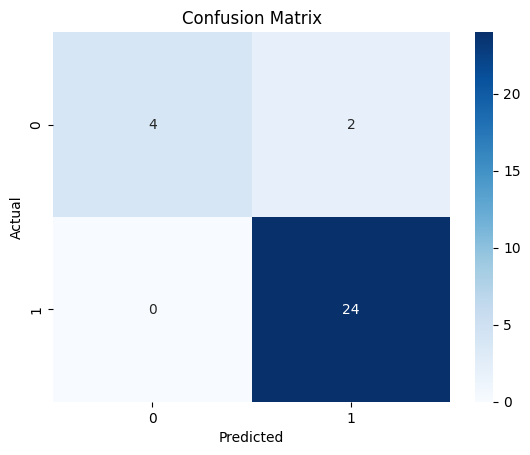

In [11]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()